<a href="https://colab.research.google.com/github/EkaJuliyanaRahayu/PrediksiHargaRumah/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

df = pd.read_csv('/content/boston.csv')
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


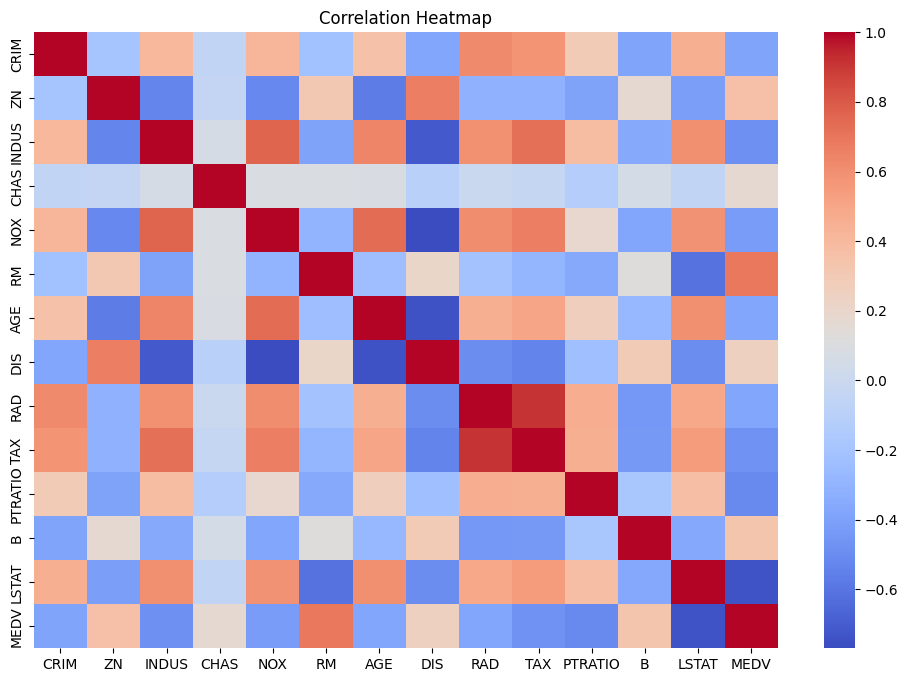

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


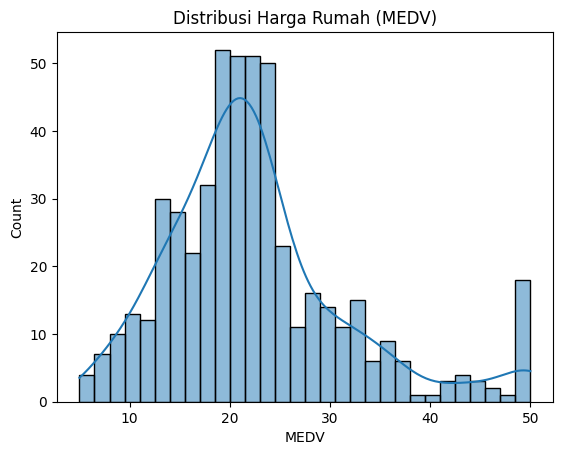

In [5]:
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title("Distribusi Harga Rumah (MEDV)")
plt.show()


In [6]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(24.291119474973513, 0.668759493535632)

In [10]:
coeff = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff


,Coefficient
CRIM,-1.002135
ZN,0.696269
INDUS,0.278065
CHAS,0.718738
NOX,-2.022319
RM,3.145240
AGE,-0.176048
DIS,-3.081908
RAD,2.251407
TAX,-1.767014


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(8.510201343137249, 0.8839525117021145)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

mse_gbr, r2_gbr


(6.208861361528038, 0.9153342280466539)

In [13]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'R2 Score': [r2, r2_rf, r2_gbr],
    'MSE': [mse, mse_rf, mse_gbr]
})

results


,Model,R2 Score,MSE
0,Linear Regression,0.668759,24.291119
1,Random Forest,0.883953,8.510201
2,Gradient Boosting,0.915334,6.208861


In [20]:
def predict_price(features_dict):
    import pandas as pd

    df_input = pd.DataFrame([features_dict])
    scaled = scaler.transform(df_input)
    pred = rf.predict(scaled)[0]
    return pred


In [22]:
input_rumah = {
    "CRIM": 0.1,
    "ZN": 25,
    "INDUS": 5,
    "CHAS": 0,
    "NOX": 0.45,
    "RM": 6.7,
    "AGE": 40,
    "DIS": 5.0,
    "RAD": 4,
    "TAX": 250,
    "PTRATIO": 17,
    "B": 390,
    "LSTAT": 5
}

predict_price(input_rumah)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(41.0225)

In [23]:
!pip install streamlit
!pip install pyngrok



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.5 MB/s eta 0:00:00


In [25]:
import pickle

# simpan model
with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# simpan scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [26]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

st.title("🏡 Prediksi Harga Rumah (Boston Dataset)")
st.write("Masukkan nilai fitur berikut untuk memprediksi harga rumah:")

# load model & scaler
model = pickle.load(open('model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

# input form
CRIM    = st.number_input("CRIM (Crime Rate)", 0.0)
ZN      = st.number_input("ZN", 0.0)
INDUS   = st.number_input("INDUS", 0.0)
CHAS    = st.number_input("CHAS (0 atau 1)", 0)
NOX     = st.number_input("NOX", 0.0)
RM      = st.number_input("RM (Jumlah Kamar)", 0.0)
AGE     = st.number_input("AGE", 0.0)
DIS     = st.number_input("DIS", 0.0)
RAD     = st.number_input("RAD", 0)
TAX     = st.number_input("TAX", 0.0)
PTRATIO = st.number_input("PTRATIO", 0.0)
B       = st.number_input("B", 0.0)
LSTAT   = st.number_input("LSTAT", 0.0)

features = [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]

if st.button("Prediksi Harga"):
    scaled = scaler.transform([features])
    pred = model.predict(scaled)[0]
    st.success(f"💰 Prediksi Harga Rumah: **{pred:.2f}** (ribu USD)")


Writing app.py


In [32]:
from pyngrok import ngrok
import time

get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

time.sleep(5)
url = ngrok.connect(8501)
url


<NgrokTunnel: "https://fallible-jayna-malarial.ngrok-free.dev" -> "http://localhost:8501">

In [31]:
# ganti "TOKEN_KAMU" dengan authtoken dari dashboard ngrok
!ngrok config add-authtoken 39D5ZiQHQg7iTCj4BLBk3xHrzfL_7K1fFfuKdGaj157CGGuSm


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
